In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
# turn seaborn defaults on
# figures will look nicer this way
# more info on controlling figure aesthetics here: https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set()

#### distplot

https://seaborn.pydata.org/tutorial/distributions.html#distribution-tutorial

Flexibly plot a univariate distribution of observations

Really nice if you are trying to see how a single output variable is distributed.

Since this plots a univariate distribution of a single r.v., this is not so useful if you are trying to see different feature columns are correlated or how a feature affects an output variable.

In [3]:
# we will try to do fit the given data using a stnadard normal kernel
from scipy.stats import norm

[Text(0, 0.5, 'y var'), Text(0.5, 0, 'x var')]

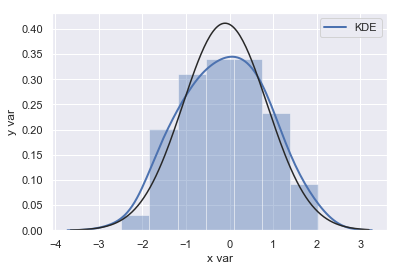

In [4]:
np.random.seed(100)
x = np.random.randn(100)
ax = sns.distplot((x), # sns wants the series passed as a tuple
                  hist=True, fit=norm, kde=True,
                  kde_kws={"color": "b", "lw": 2, "label": "KDE"},
                 )
ax.set(xlabel='x var', ylabel='y var')

As you can see that sns normalizes the x and then plots it. KDE is Kernel Density Estimator.
Note that we cannot fit using KDE. We can only do fitting with a known distribution. Here
it is norm (standard normal distribution). Fitting means that sns will plot the normal distribution curve using the datapoints in x.

#### KDE Plot

We don't need this plot very often. 
The times when this plot is useful is when 
- we don't want to use the default kde option in distplot. We wish to have more control over how kde plot is created
- we want to plot CDF instead of a PDF.
- we wish to plot in 2D or 3D, we will need to use this plot (default kde in distplot.
- We have a multimodal distribution (like normal-ish with 2 or 3 peaks or more)

note: 
- kernel : takes many values. These dont make much of a difference. Most of the time, 'gau' or gaussian will be fine. If its a multimodal distribution, or if we don't want fat-tails (kurtosis), we can go for others. Like 'cos' shows a lot less kurtosis.
- bw: or bandwidth does make a lot of difference on the resulting plot. 
  - if its a normal distribution, choose 'silverman'. 'scott' also works fine on  normal distributions
  - for non-normal distributions, use 'scalar', 'pair of scalars'
- cut: does not plot beyond the specified points. Especially useful if do not want to show tails extending into range of values that are impossible (like negative heights of people).
- clip: this provides the lower and upper bounds for datapoints used to fit KDE. Note that the KDE plot will extend beyond those points (for making the plot stop at a certain point, use cut)
- cumulative: use this option to plot a CDF instead of a PDF

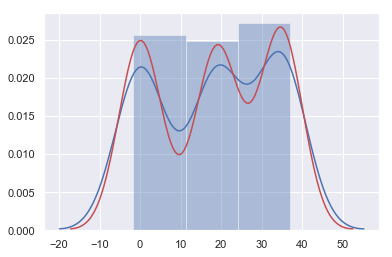

In [5]:
# lets create a dataset
import random
np.random.seed(0)
points = list(np.random.randn(1000))
x = random.sample(points,100)
y = np.array(random.sample(points,100))+35
z = np.array(random.sample(points,100))+19
z = np.concatenate((x,y,z))
z = random.sample(list(z), 100)
ax = sns.distplot(z, kde=True)
ax = sns.kdeplot(z, kernel='gau', bw='silverman', color='r')

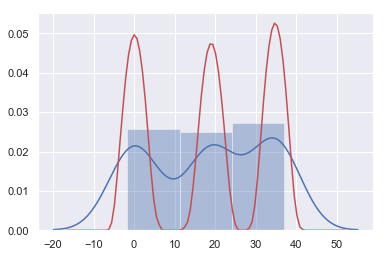

In [6]:
ax = sns.distplot(z, kde=True)
ax = sns.kdeplot(z, kernel='cos', bw=5, color='r')

#### pairplot

This is one of the most used plots. It gives margin-distribution plots (histograms) along the diagonal and joint-distribution plots (scatter plots) along the margins (i.e. off diagonals)

Note: jointplot and pairplot make visualizations with multiple plots possible. jointplot focuses on a single relationship while pairplot takes a broader view, showing all pairwise relationships and the marginal distributions, optionally conditioned on a categorical variable.

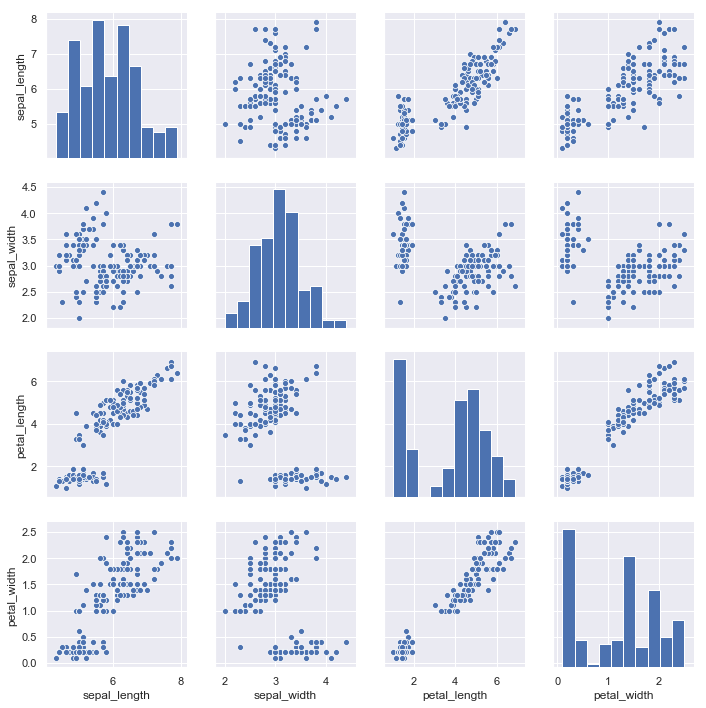

In [7]:
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)

##### Show different levels of a categorical variable by the color of plot elements:
- use diag_kind: to choose the kind of joint-distribution we want. 'kde' or 'hist'
    - 'hist' is my personal preference

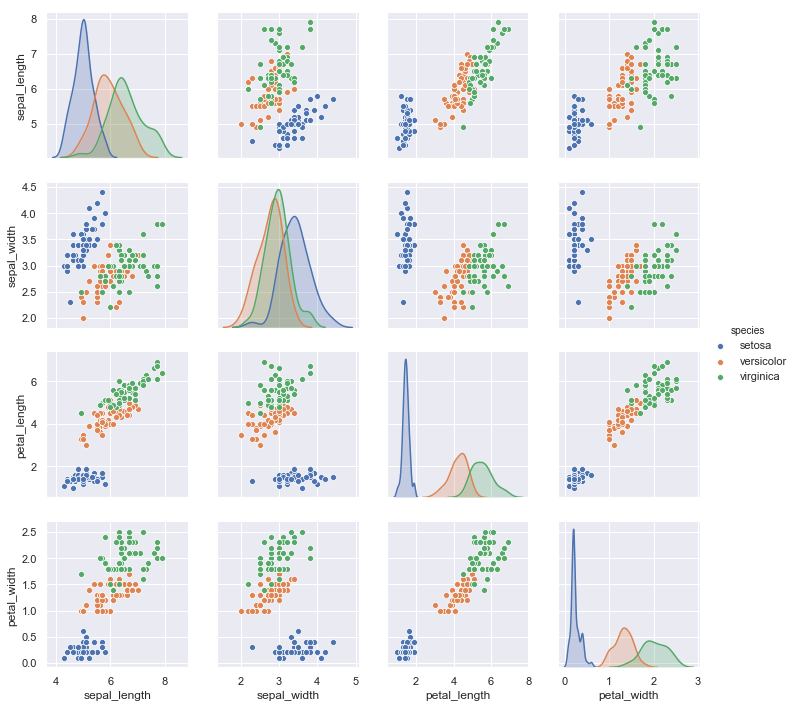

In [8]:
g = sns.pairplot(iris, hue="species", diag_kind='kde')

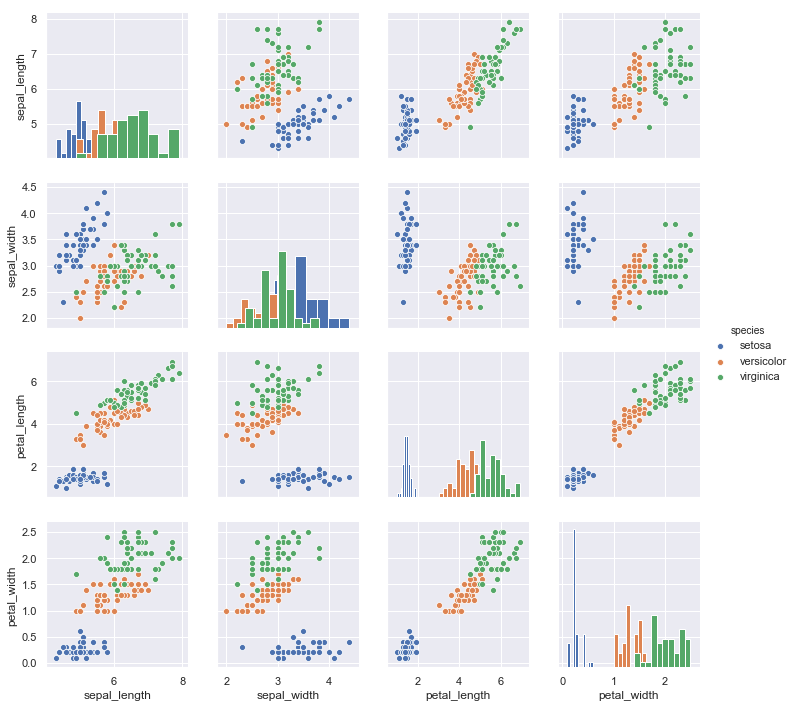

In [9]:
g = sns.pairplot(iris, hue="species", diag_kind='hist')

##### Some basics:
- Prediction Interval:
    - 95% prediction interval 
        - 95% of the Y-values to be found for a certain X-value will be within the interval range around the linear regression line.
        
- Confidence Interval:
    - 95% confidence interval
        - there is a 95% probability that the true best-fit line for the population lies within the confidence interval
        
- Confidence interval is always much narrower than the prediction interval
- The more sample points you add, the narrower the confidence interval becomes. If there are sufficient points, the coonfidence interval is so precise that it is indistinguishable from the best fit regression curve ( straight line for linear regression)
- The 95% prediction interval spans around 2-sigma distance around the mean

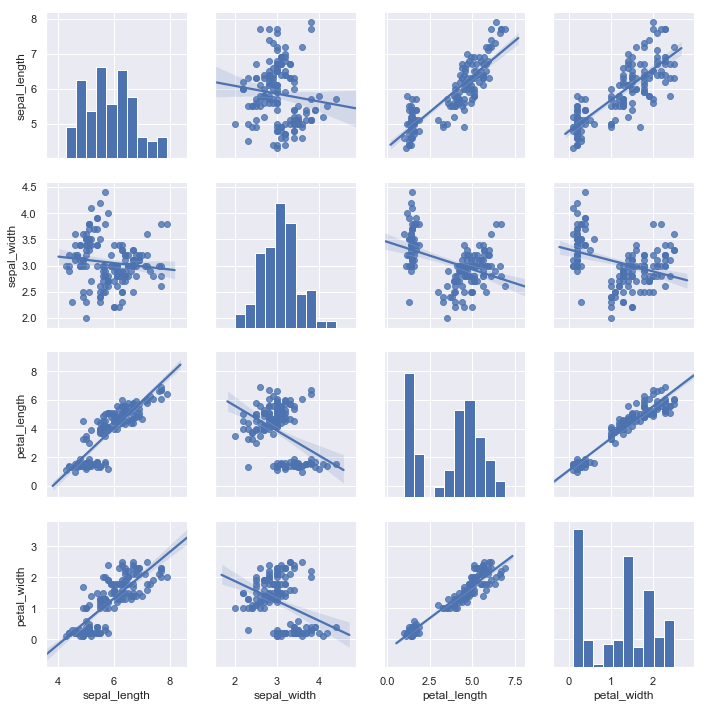

In [10]:
# kind='reg' generates regression.
# you can also see the confidence-intervals shaded around the regression line
g = sns.pairplot(iris, diag_kind='hist', kind='reg')

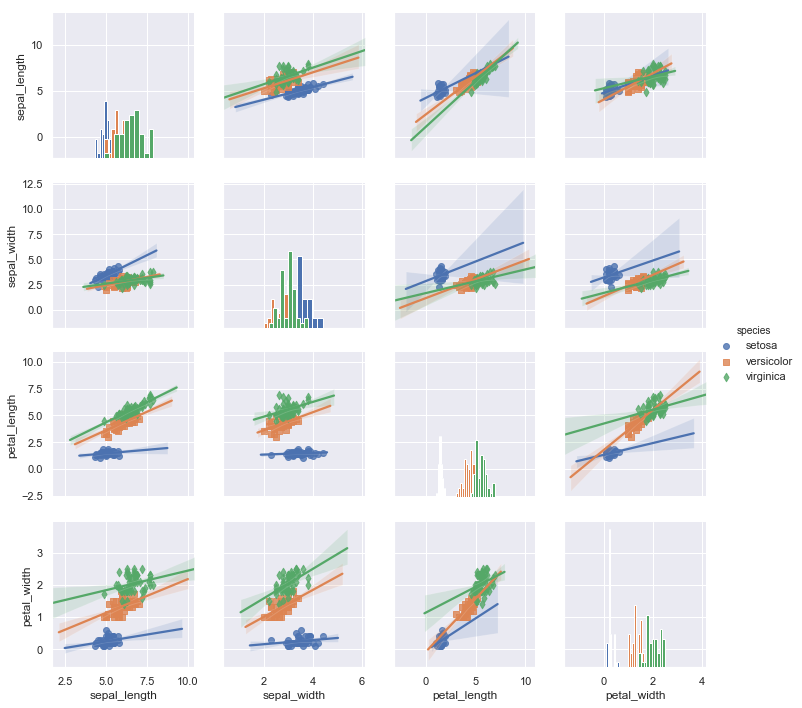

In [11]:
# with the categorical info
g = sns.pairplot(iris, diag_kind='hist', kind='reg', hue='species', markers=['o','s','d'])

#### stripplot

Not very useful but it is here

Do not use this with big data (excess of 10k points). It will probably freeze the computer.

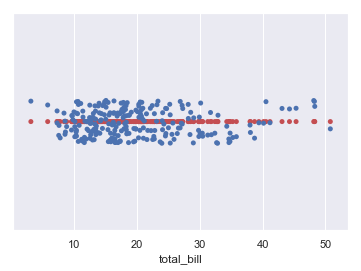

In [12]:
tips = sns.load_dataset("tips")
# Add jitter to bring out the distribution of values
ax = sns.stripplot(x=tips["total_bill"], jitter=False, color='r')
ax = sns.stripplot(x=tips["total_bill"], jitter=True, color='b')

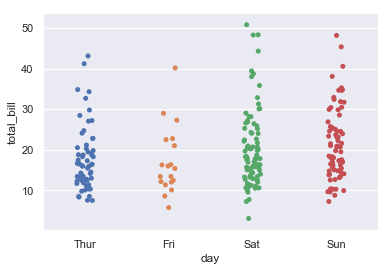

In [13]:
# group the strips by categorical data
ax = sns.stripplot(x="day", y="total_bill", data=tips)

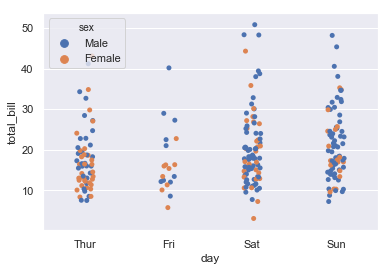

In [14]:
ax = sns.stripplot(x="day", y="total_bill", data=tips, hue='sex')

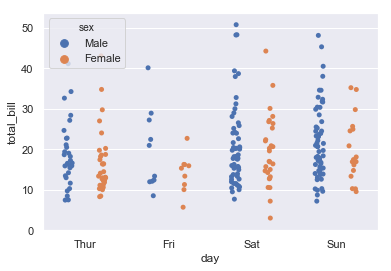

In [15]:
# we can use 'dodge' to split things that are hued. This is just to improve visualization
ax = sns.stripplot(x="day", y="total_bill", data=tips, hue='sex', dodge=True)

#### swarmplot

Does all that stripplot does. Only difference is that data points do not overlap. Overlapping datapoints are shifted around in the shape of an arch.

Do not use this with big data (excess of 10k points). It will probably freeze the computer.

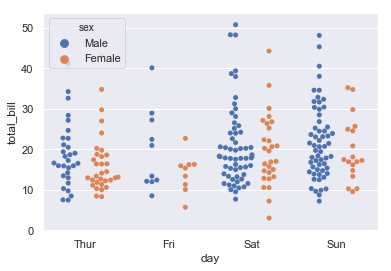

In [16]:
ax = sns.swarmplot(x="day", y="total_bill", data=tips, hue='sex', dodge=True)

#### boxplot

Very good for getting a feel of the distribution of the data

The outliers are calculated as -
- if the data points before 1st and after 3rd quartiles are too far apart from the median, the whiskers will get too long. To avoid this, when either whisker gets longer than 1.5 times the inter-quartile range (distance between Q1 and Q3), the whisker gets clipped at 1.5*inter-quartile-range on either side of the box. Points falling beyond the clip are marked as outliers 

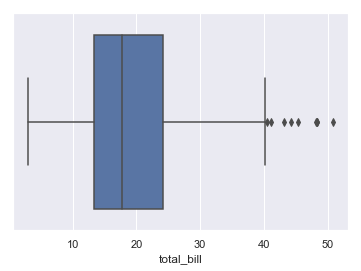

In [17]:
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])

Draw a vertical boxplot grouped by a categorical variable:

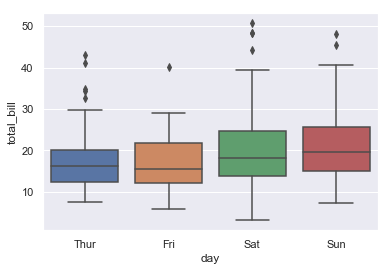

In [18]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

Draw a boxplot with nested grouping by two categorical variables:

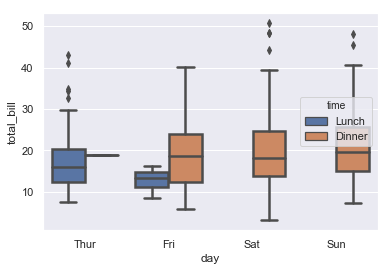

In [19]:
ax = sns.boxplot(x="day", y="total_bill", hue="time",data=tips, linewidth=2.5)

Draw a boxplot for each numeric variable in a DataFrame:

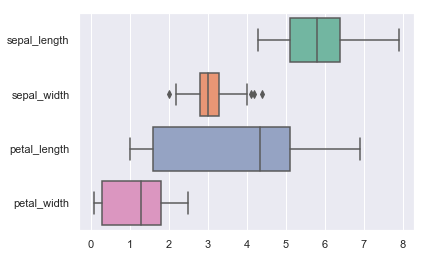

In [20]:
iris = sns.load_dataset("iris")
ax = sns.boxplot(data=iris, orient="h", palette="Set2")

Use swarmplot() to show the datapoints on top of the boxes:

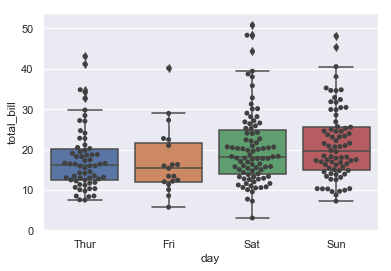

In [21]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)
ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

#### jointplot

- Very good to visualize bivarite distributions (distributions with two variables.. like output_var vs input_var). 
- THis plot will also give marginal distribution (univariate) for each of the two variables
- THis is not a very good way to visualize multivaritate (three and more) distributions

Draw a scatterplot with marginal histograms:

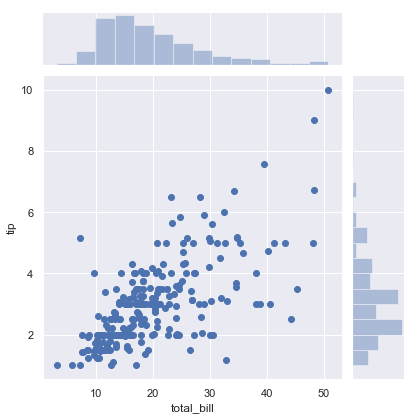

In [22]:
tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips)

Add regression and kernel density fits:

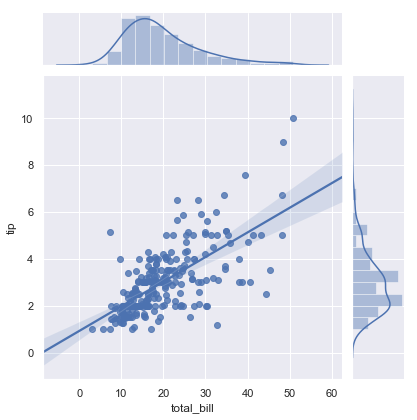

In [23]:
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg")

Add pearson corr coeff and p value:

/home/helios/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


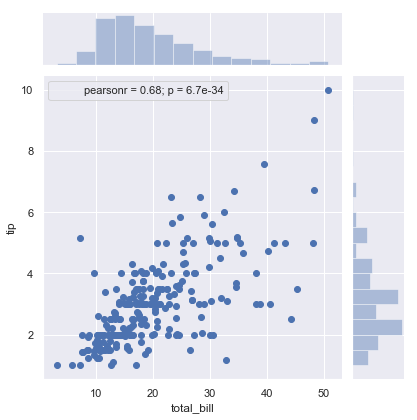

In [30]:
from scipy.stats import pearsonr
g = sns.jointplot(x='total_bill', y='tip', data=tips)
g.annotate(pearsonr);

/home/helios/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


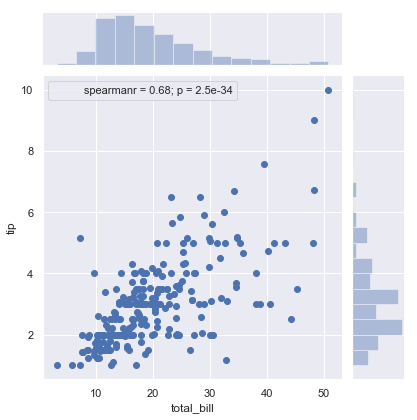

In [36]:
# add spearmanr corr coeff with the p value
from scipy.stats import spearmanr
g = sns.jointplot(x='total_bill', y='tip', data=tips)
g.annotate(spearmanr);

another cool thing is that you can add more plots over jointplot... both in the jointplot part and marginalplot part

/home/helios/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


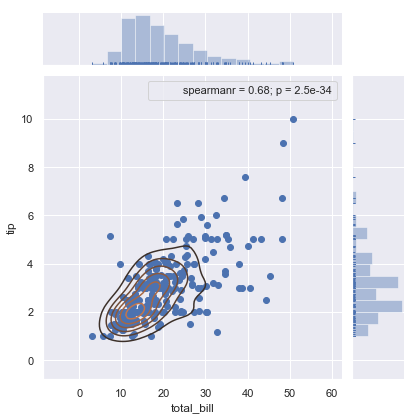

In [38]:
g = (sns.jointplot(x='total_bill', y='tip', data=tips, stat_func=spearmanr)
.plot_joint(sns.kdeplot, n_levels=6)
.plot_marginals(sns.rugplot))
# on the marginals, you are going to add univariate plots
# on the joints, you are going to add bivariate plots 

#### violinplot

violin plot is a combination of the box-plot and the kernel density estimate plot.
- NOTE: use 'scale' to scale the violin plots the way you want. By default, they are scaled to appear of similar width, and can be vey deceptive.
- Like in the tips, I use scale as count to view the size of distributions relative to eachother

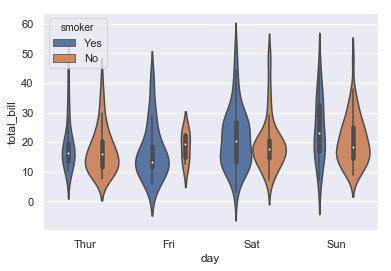

In [57]:
g = sns.violinplot(x='day', y='total_bill', hue='smoker', data=tips, scale='count')

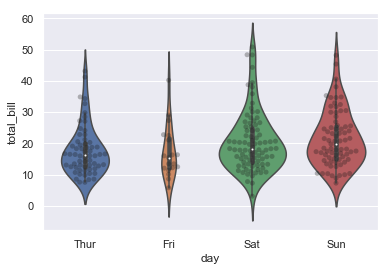

In [56]:
# use in conjnction with a swarmplot
# use scale to scale the violin plot in accordance to count
g = sns.swarmplot(x="day", y="total_bill", data=tips, color=".1", alpha=0.3)
g = sns.violinplot(x='day', y='total_bill', data=tips, scale='count')

#### lmplots (linear model plots)

- used to plot linear regression model

- We have seen these plots earlier where we drew a best fit straight line (linear regression plot) with confidence interval around it. 

- anytime you are doing a linear regression (or polynomial regression), you might do these plots: lmplot, residplot, coeffplot

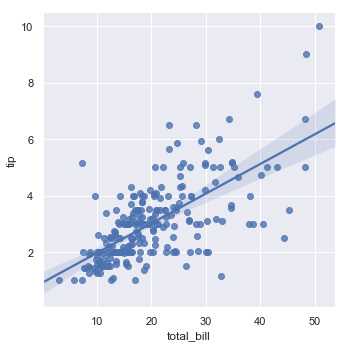

In [60]:
g = sns.lmplot(x='total_bill', y='tip', data=tips)

you can also specify rows and cols

- splitting the graph into a grid of rows and cols is called faceting (originates from FacetGrid in R)
- row and col variables are categorical

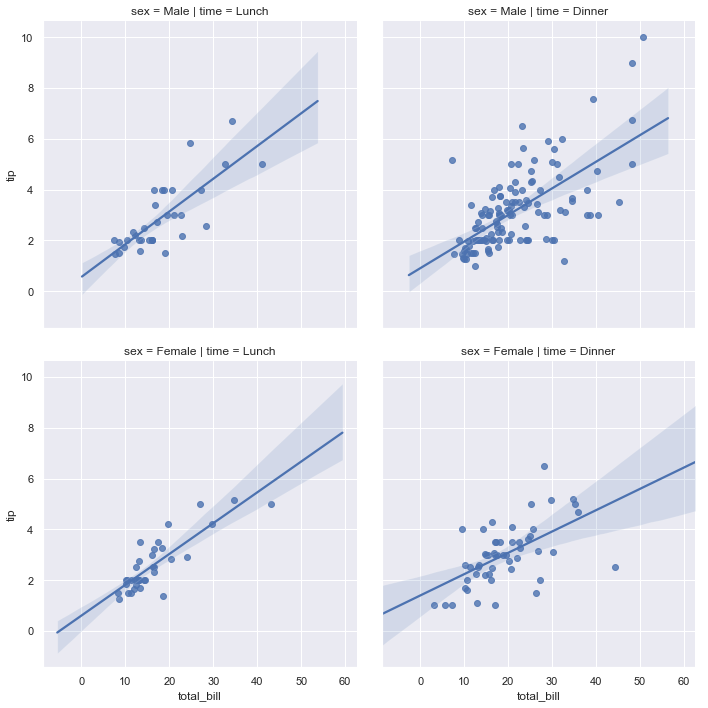

In [61]:
g = sns.lmplot(x='total_bill', y='tip', data=tips, row='sex', col='time')

 - of course you can specify all 3 i.e. hue, row and col

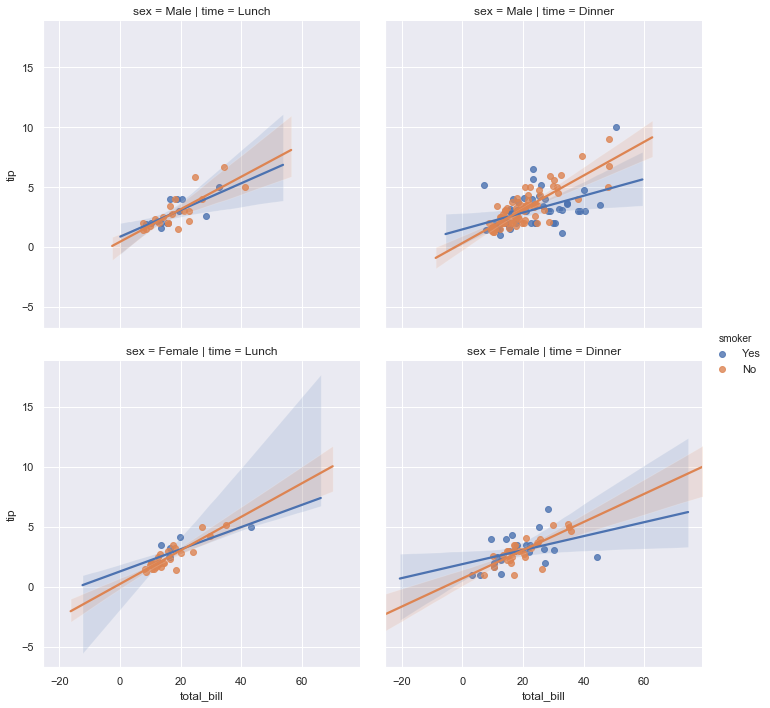

In [62]:
# a total of 8 regressions are computed and plotted
g = sns.lmplot(x='total_bill', y='tip', data=tips, row='sex', col='time', hue='smoker')

you can also plot the tips aginst discrete variable like size.

a good thing here will be to add some x_jitter since a lot of ponints are tighly stacked one on top of another, adding some jitter makes it easy to visualize how many points are there

the regression is still done on the base points. It is not done on the jittered points (since jitter is artificially added to aid in gettign a sense of how many points are there)

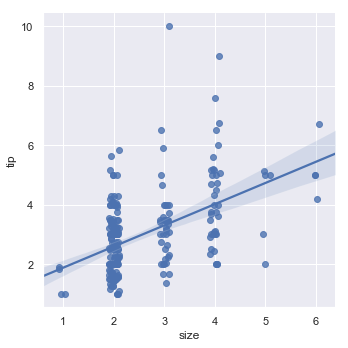

In [65]:
g = sns.lmplot(x='size', y='tip', data=tips, x_jitter=.1)

If there are multiple instances of each variable along x, you can provide a reduction function to x_estimator to visualize a summary statistic such as the mean.

x_estimator is a great way to visualize the dispersion of tips around categorical points like size. x_jitter doesnt do that much good compared to x_estimator.

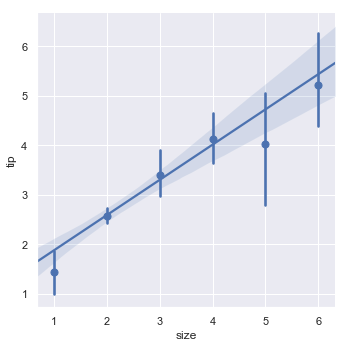

In [69]:
g = sns.lmplot(x='size', y='tip', data=tips, x_estimator=np.mean)

you can control the confidence intervals
- x_ci controls the confidence interval for the x_estimator (plotted along the vertical line). x_ci Reduces the size of the confidence intervals around the summarized values. x_ci is a percentage 0-100
- ci controls the confidence interval around the linear regression line. smaller values create narrower confidence band. In other words, ci Reduces the size of the confidence intervals around the regression line. ci is a percentage 0-100

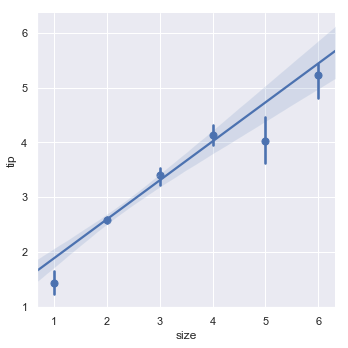

In [71]:
g = sns.lmplot(x='size', y='tip', data=tips, x_estimator=np.mean, x_ci=50, ci=80)
# 50% confidence interval around x_estimator. 
# 80% confidence around the regression line

If we have non-discrete data points, we can make them discrete by putting them in bins.
Personally, for me, I dont use binning much.

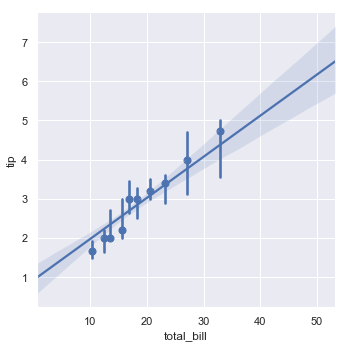

In [75]:
g = sns.lmplot(x='total_bill', y='tip', data=tips, x_bins=10, x_estimator=np.median)

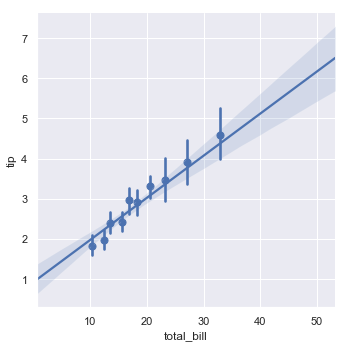

In [76]:
g = sns.lmplot(x='total_bill', y='tip', data=tips, x_bins=10, x_estimator=np.mean)

## please check here for tutorial on lmplot and regplot

## the tutorial will also show other regression plots like residuals
## excellent source if you wish to also fit a polynomial regression model to model some simple kinds of non-linear trends in the dataset

https://seaborn.pydata.org/tutorial/regression.html#regression-tutorial

#### pointplot

use this to plot a categorical variable (on x axis) and its relation to the quantitative variable on the y-axis (you can do it the other way too, categorical on y-axis and quantitative on the x-axis). 

Not very helpful but here it is.

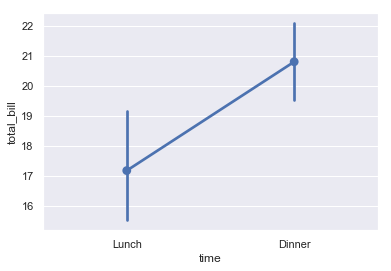

In [78]:
g = sns.pointplot(x='time', y='total_bill', data=tips)
# what this show is that people spend on Dinner more than lunch
# the line connecting the two categorical variables is not necessary but I guess people 
# dig angled lines better to conclude high/low

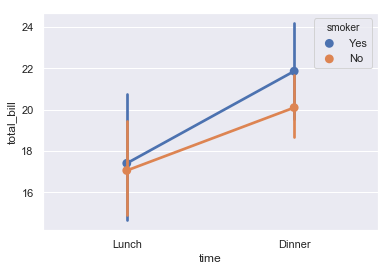

In [80]:
g = sns.pointplot(x='time', y='total_bill', data=tips, hue='smoker')
# the proble with plotting both together is that you cant see either clearly. So 
# set dodge=True

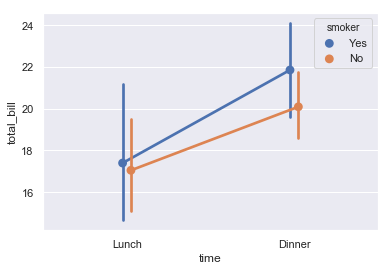

In [81]:
g = sns.pointplot(x='time', y='total_bill', data=tips, hue='smoker', dodge=True)

you can pass in an estimator and confidence interval (the default is np.mean)

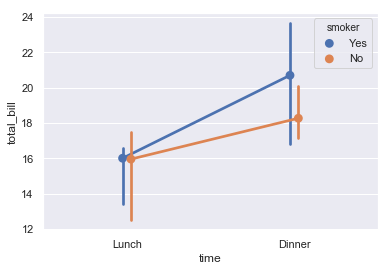

In [86]:
g = sns.pointplot(x='time', y='total_bill', data=tips, hue='smoker', dodge=True, 
                 estimator=np.median)

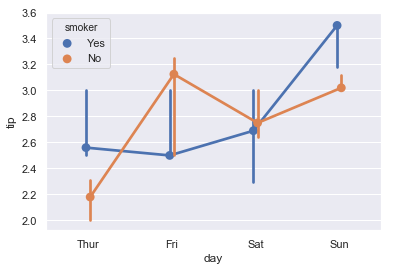

In [88]:
g = sns.pointplot(x='day', y='tip', data=tips, hue='smoker', dodge=True, 
                 estimator=np.median, ci=50)

you can also give them caps on the top and bottom

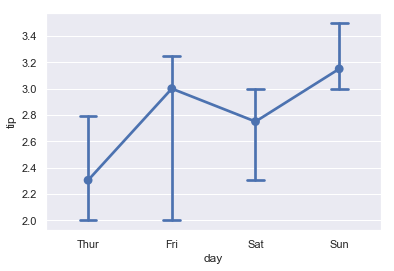

In [92]:
g = sns.pointplot(x='day', y='tip', data=tips,
                 estimator=np.median, capsize=.2)

#### barplot

a worse version of pointplot. not very useful

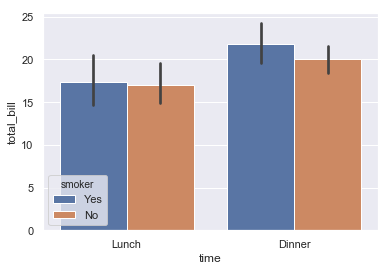

In [94]:
g = sns.barplot(x='time', y='total_bill', data=tips, hue='smoker', 
                 estimator=np.mean)

#### countplot

A countplot will count the number of points that you have.

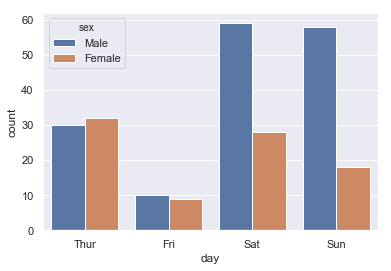

In [97]:
# it displays the number of rows in the dataset for each day, and for each sex
g = sns.countplot(data=tips, x='day', hue='sex')

#### catplot

cat plot are an exception in that they can be used to display all other plots we talked about before (except regression plots).

where they are useful is that they can be used to diplay in a faceted manner (grid of rows and cols)

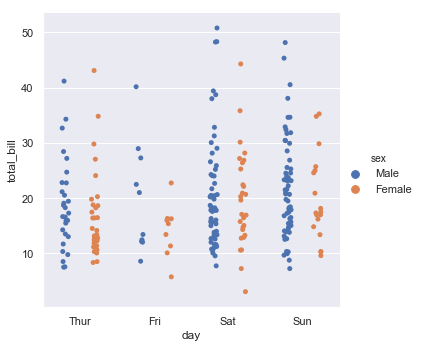

In [101]:
# default will show a stripplot
g = sns.catplot(x='day', y='total_bill', hue='sex', data=tips, dodge=True)

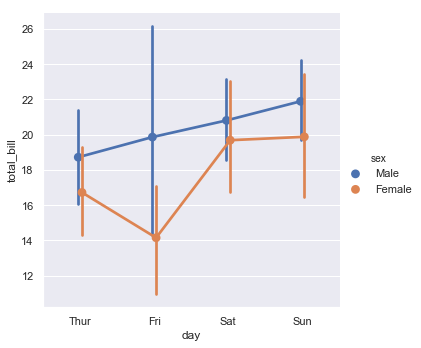

In [102]:
g = sns.catplot(x='day', y='total_bill', hue='sex', data=tips, dodge=True, kind='point')

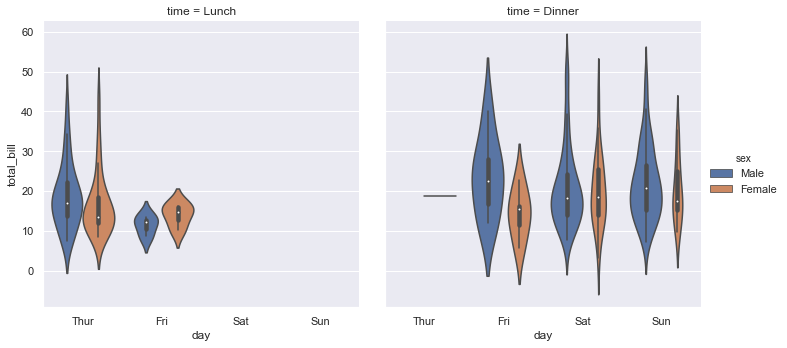

In [107]:
# note this faceting based on time would not have been possible with violinplot
# here we have plotted with two categories - time and sex
g = sns.catplot(x='day', y='total_bill', hue='sex', data=tips,
                scale='count', col='time',
                dodge=True, kind='violin')

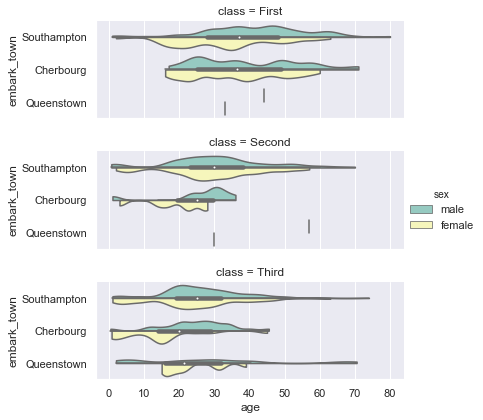

In [113]:
# Plot horizontally and pass other keyword arguments to the plot function:
# distribution of males and females are shown with the violin plot
# joint distribution of male and female is shown using the box plot
titanic = sns.load_dataset('titanic')

g = sns.catplot(x="age", y="embark_town",
                hue="sex", row="class",
                data=titanic[titanic.embark_town.notnull()],
                orient="h", height=2, aspect=3, palette="Set3",
                kind="violin", cut=0, bw=.2, split=True)

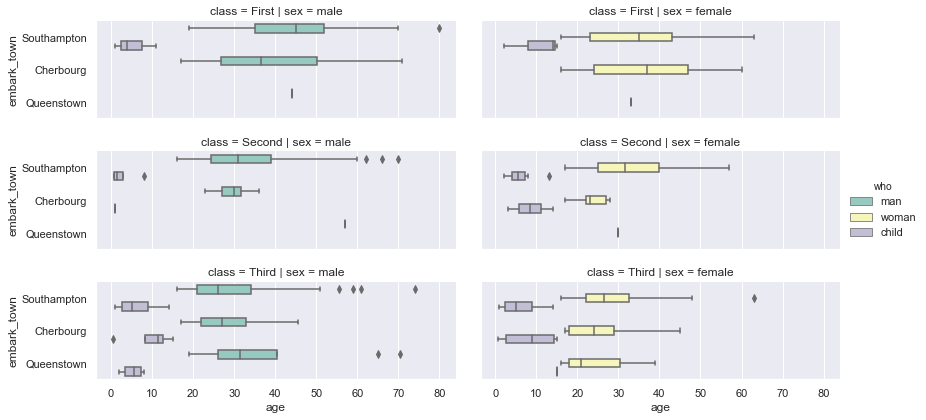

In [115]:
g = sns.catplot(x="age", y="embark_town",
                hue="who", row="class", col='sex',
                data=titanic[titanic.embark_town.notnull()],
                orient="h", height=2, aspect=3, palette="Set3",
                kind="box")

#### heatmap

very useful to visualize 3d data - two variables along x and y and the third one is plotted as color gradient in the heat map

In [118]:
flights = sns.load_dataset('flights')

flights_pivoted = flights.pivot('month', 'year','passengers')
flights_pivoted.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


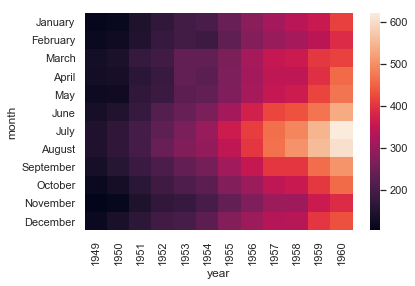

In [120]:
ax = sns.heatmap(flights_pivoted)
# so, over the years, passengers definitely travel more around July and August